## Homework 2

It's time to test your new pandas skills! Use the provided .csv file to complete the tasks below!

Student Name: xxx


### Task 1. Fictitious Names

***
* Step 1. Import the necessary libraries and create 3 DataFrames


In [2]:
import pandas as pd

raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

df1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
df2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
df3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

***
* Step 2. Join df1 and df2 along rows.

In [3]:
pd.concat([df1, df2])

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


***
* Step 3. Join df1 and df2 along columns

In [4]:
pd.concat([df1, df2], axis = 1)

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


***
* Step 4. Merge df1 with df3 along the 'subject_id' value.

In [5]:
pd.merge(df1, df3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,5,Ayoung,Atiches,16


***
* Step 5. Merge only the data that has the same 'subject_id' on both df1 and df2.

In [6]:
pd.merge(df1, df2, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


***
* Step 6. Merge all values in df1 and df2, with matching records from both sides where available.

In [7]:
pd.merge(df1, df2, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


***
### Task 2. Visualizing Tips' Data

***
Step 1. Import the necessary libraries and import the dataset from <u>tips.csv</u>

In [39]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [40]:
import pandas as pd

df = pd.read_csv('tips.csv')

df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


***
* Step 2. Plot the total_bill column histogram and density.

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

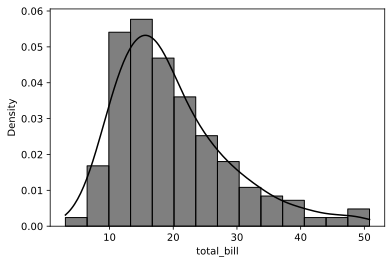

In [41]:
import seaborn as sns

sns.histplot(df['total_bill'], color='k', kde=True, stat="density")

***
* Step 3. Create a scatter plot presenting the relationship between total_bill and tip

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

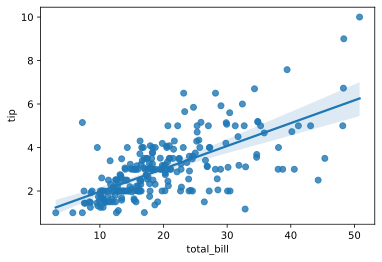

In [42]:
sns.regplot(x='total_bill', y='tip', data=df)

***
* Step 4. Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

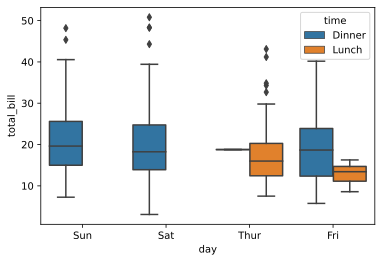

In [43]:
sns.boxplot(x='day', y='total_bill', hue='time', data=df)

***
* Step 5. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

<AxesSubplot:title={'center':'Dinner'}, ylabel='Frequency'>

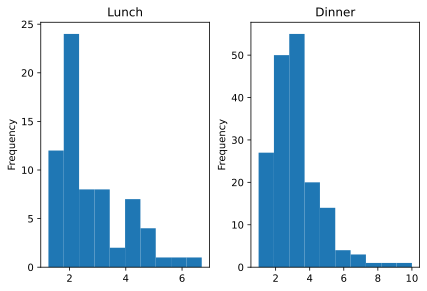

In [44]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2)

fig.tight_layout()

df[df['time'] == 'Lunch']['tip'].plot.hist(ax=axes[0], title='Lunch')
df[df['time'] == 'Dinner']['tip'].plot.hist(ax=axes[1], title='Dinner')

***
* Step 6 . Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship.

<AxesSubplot:title={'center':'Male'}, xlabel='total_bill', ylabel='tip'>

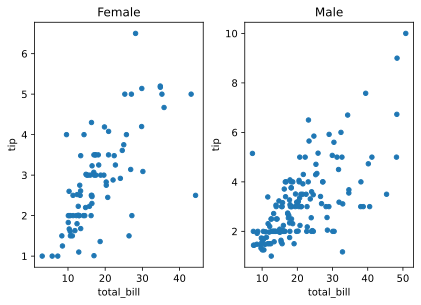

In [45]:
fig, axes = plt.subplots(1, 2)

fig.tight_layout()

df[df['sex'] == 'Female'].plot.scatter(x='total_bill', y='tip',ax=axes[0], title='Female')
df[df['sex'] == 'Male'].plot.scatter(x='total_bill', y='tip',ax=axes[1], title='Male')

***
BONUS: Create your own question and answer it using a graph.

***
### Task 3. Apple Stock

***
* Step 1. Import the necessary libraries and import the dataset from <u>apple.csv</u>

In [46]:
import pandas as pd

df = pd.read_csv('appl_1980_2014.csv')

df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


***
* Step 2. Transform the 'Date' column as a datetime type and set the date as the index.

In [47]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date')

df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


***
* Step 3. It seems the index is from the most recent date. Make the first entry the oldest date. 

In [48]:
df = df.sort_index(ascending = True)

df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


***
* Step 4. What is the difference in days between the first day and the oldest.

In [50]:
(df.index[-1] - df.index[0]).days

12261

***
* Step 5. How many months in the data we have?

In [51]:
df_months = df.resample('M').count()

len(df_months)

404

***
* Step 6. Get the monthly average stock price.

In [52]:
df.resample('M', kind='period').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
...,...,...,...,...,...,...
2014-03,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


***
* Step 7. Get the stock price at the last business day of each month. (tips: dropna)

In [53]:
df.resample('BM').asfreq().dropna()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600.0,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200.0,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400.0,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400.0,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800.0,0.44
...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200.0,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300.0,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200.0,83.83


***
* Step 8. Get the 'Close' price change of each day.

In [54]:
df['price_change'] =  df['Close'] / df['Close'].shift(1) - 1

df

,Open,High,Low,Close,Volume,Adj Close,price_change
Date,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,NaN
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,-0.052174
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,-0.073394
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,0.024554
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,0.029378
...,...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,0.006349
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,-0.000428
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,0.005884


***
* Step 9. Creat a line plot for 'Close' price and 'Adj Close' price.

In [55]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

<AxesSubplot:xlabel='Date'>

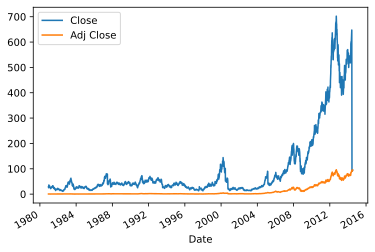

In [56]:
df[['Close','Adj Close']].plot()